In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import re

In [84]:
twitter_data=pd.read_csv("twitterdata.csv")
# bitcoin=pd.read_csv("bitcoin.csv")

In [85]:
twitter_data.head()

,Unnamed: 0,tweets,time,likes,no:rt
0,0,"RT @MocktailSwap: Get ready for the Best Farming Pools in Defi Market\n\nLaunching 21:00 UTC 18th April, 2021\n\nDon't forget, Last chance to B…",2021-04-19 09:16:33,0,822
1,1,"The current price of Bitcoin is $57008.00.\nThe current price of BCash is $962.91, or 0.01689079 BTC.\nThe current pr… https://t.co/euxMzcYZXJ",2021-04-19 09:15:02,0,0
2,2,"RT @JunkoSu22993224: If Chainlink Hits $50.00 This Week. \nGiving away $50.00 to every person that leaves a comment, retweets and likes this…",2021-04-19 09:14:54,0,624
3,3,"RT @MocktailSwap: Get ready for the Best Farming Pools in Defi Market\n\nLaunching 21:00 UTC 18th April, 2021\n\nDon't forget, Last chance to B…",2021-04-19 09:14:43,0,822
4,4,"RT @MocktailSwap: Get ready for the Best Staking Pools in Defi Market\n\nLaunching 21:00 UTC 18th April, 2021\n\nDon't forget, Last chance to B…",2021-04-19 09:14:38,0,315


In [86]:
twitter_data.drop(columns="Unnamed: 0",inplace=True)

In [87]:
twitter_data.tail()

,tweets,time,likes,no:rt
9995,"The current price of bitcoin is $60,105.00. It has increased by 0.796% in the last 24 hours #bitcoin #btc #cryptocurrency",2021-04-12 21:03:50,0,0
9996,New Bitcoin block 00..840be452159338efb634b29c6fe133f64287a825d574c: 2469 transactions transferred a total of 8871.… https://t.co/6HoGTDkDoJ,2021-04-12 21:01:00,0,1
9997,on the 04/12/2021 at 09:00 1BTC was worth $60061.00 #Bitcoin #Crypto #BotcoinUSD #Bitfinex,2021-04-12 21:00:39,0,0
9998,"Top 5 Cryptocurrencies - Current Prices\n\nBitcoin $BTC: $60,156.99 ⬆️ +0.09%\nEthereum $ETH: $2,151.34 ⬆️ +0.44%\nBina… https://t.co/NBqTYdasvH",2021-04-12 21:00:32,1,0
9999,📉 Biggest Losers (1 hr) 📉\nBitcoin Standard Hashrate Token $BTCST -5.84% ❄️\nMaidSafeCoin $MAID -5.52% ❄️\nSwissBorg… https://t.co/6AUG91CdIM,2021-04-12 21:00:30,0,0


In [88]:
twitter_data=twitter_data.sort_values(by="time",ignore_index=True)

In [89]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  10000 non-null  object
 1   time    10000 non-null  object
 2   likes   10000 non-null  int64 
 3   no:rt   10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [90]:
from datetime import datetime
twitter_data["time"] = pd.to_datetime(twitter_data['time'])

In [91]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [92]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [93]:
twitter_data["clean_tweet"]=twitter_data["tweets"].apply(lambda x:clean_tweet(x))

In [94]:
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return "positive"
    elif analysis.sentiment.polarity==0:
        return "neutral"
    else:
        return "negative"

In [95]:
twitter_data["sentiment"]=twitter_data["clean_tweet"].apply(lambda x:analyze_sentiment(x))

In [96]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
twitter_data["polarity"]=twitter_data["clean_tweet"].apply(getpolarity)
twitter_data["subjectivity"]=twitter_data["clean_tweet"].apply(getsubjectivity)

In [97]:
twitter_data.head()

,tweets,time,likes,no:rt,clean_tweet,sentiment,polarity,subjectivity
0,📉 Biggest Losers (1 hr) 📉\nBitcoin Standard Hashrate Token $BTCST -5.84% ❄️\nMaidSafeCoin $MAID -5.52% ❄️\nSwissBorg… https://t.co/6AUG91CdIM,2021-04-12 21:00:30,0,0,Biggest Losers 1 hr Bitcoin Standard Hashrate Token BTCST 5 84 MaidSafeCoin MAID 5 52 SwissBorg,negative,-0.100000,0.100000
1,"Top 5 Cryptocurrencies - Current Prices\n\nBitcoin $BTC: $60,156.99 ⬆️ +0.09%\nEthereum $ETH: $2,151.34 ⬆️ +0.44%\nBina… https://t.co/NBqTYdasvH",2021-04-12 21:00:32,1,0,Top 5 Cryptocurrencies Current Prices Bitcoin BTC 60 156 99 0 09 Ethereum ETH 2 151 34 0 44 Bina,positive,0.250000,0.450000
2,on the 04/12/2021 at 09:00 1BTC was worth $60061.00 #Bitcoin #Crypto #BotcoinUSD #Bitfinex,2021-04-12 21:00:39,0,0,on the 04 12 2021 at 09 00 1BTC was worth 60061 00 Bitcoin Crypto BotcoinUSD Bitfinex,positive,0.300000,0.100000
3,New Bitcoin block 00..840be452159338efb634b29c6fe133f64287a825d574c: 2469 transactions transferred a total of 8871.… https://t.co/6HoGTDkDoJ,2021-04-12 21:01:00,0,1,New Bitcoin block 00 840be452159338efb634b29c6fe133f64287a825d574c 2469 transactions transferred a total of 8871,positive,0.068182,0.602273
4,"The current price of bitcoin is $60,105.00. It has increased by 0.796% in the last 24 hours #bitcoin #btc #cryptocurrency",2021-04-12 21:03:50,0,0,The current price of bitcoin is 60 105 00 It has increased by 0 796 in the last 24 hours bitcoin btc cryptocurrency,neutral,0.000000,0.233333


In [98]:
twitter_data["sentiment"].value_counts().iplot(kind="bar",xTitle="sentiment",yTitle="count")

In [99]:
all_tweets = ' '.join(tweet for tweet in twitter_data['clean_tweet'])

In [100]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_tweets)

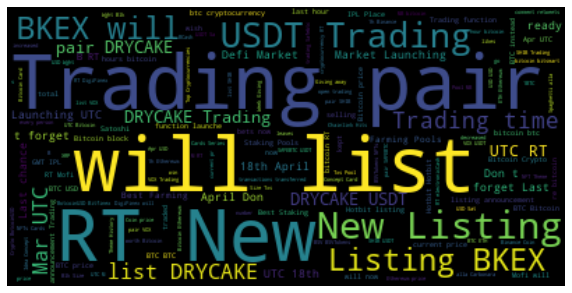

In [101]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

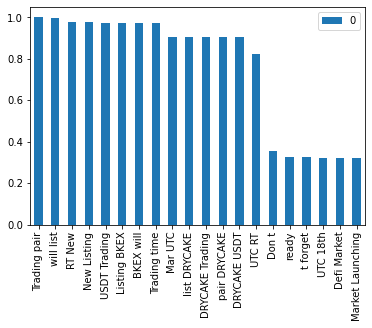

In [102]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()
plt.show()

In [103]:
twitter_data.drop(columns=["tweets"],inplace=True)

In [104]:
twitter_data.head()

,time,likes,no:rt,clean_tweet,sentiment,polarity,subjectivity
0,2021-04-12 21:00:30,0,0,Biggest Losers 1 hr Bitcoin Standard Hashrate Token BTCST 5 84 MaidSafeCoin MAID 5 52 SwissBorg,negative,-0.100000,0.100000
1,2021-04-12 21:00:32,1,0,Top 5 Cryptocurrencies Current Prices Bitcoin BTC 60 156 99 0 09 Ethereum ETH 2 151 34 0 44 Bina,positive,0.250000,0.450000
2,2021-04-12 21:00:39,0,0,on the 04 12 2021 at 09 00 1BTC was worth 60061 00 Bitcoin Crypto BotcoinUSD Bitfinex,positive,0.300000,0.100000
3,2021-04-12 21:01:00,0,1,New Bitcoin block 00 840be452159338efb634b29c6fe133f64287a825d574c 2469 transactions transferred a total of 8871,positive,0.068182,0.602273
4,2021-04-12 21:03:50,0,0,The current price of bitcoin is 60 105 00 It has increased by 0 796 in the last 24 hours bitcoin btc cryptocurrency,neutral,0.000000,0.233333


In [105]:
twitter_data["time"]=twitter_data["time"].dt.strftime("%Y-%m-%d, %H:%M")

In [106]:
twitter_data.head()

,time,likes,no:rt,clean_tweet,sentiment,polarity,subjectivity
0,"2021-04-12, 21:00",0,0,Biggest Losers 1 hr Bitcoin Standard Hashrate Token BTCST 5 84 MaidSafeCoin MAID 5 52 SwissBorg,negative,-0.100000,0.100000
1,"2021-04-12, 21:00",1,0,Top 5 Cryptocurrencies Current Prices Bitcoin BTC 60 156 99 0 09 Ethereum ETH 2 151 34 0 44 Bina,positive,0.250000,0.450000
2,"2021-04-12, 21:00",0,0,on the 04 12 2021 at 09 00 1BTC was worth 60061 00 Bitcoin Crypto BotcoinUSD Bitfinex,positive,0.300000,0.100000
3,"2021-04-12, 21:01",0,1,New Bitcoin block 00 840be452159338efb634b29c6fe133f64287a825d574c 2469 transactions transferred a total of 8871,positive,0.068182,0.602273
4,"2021-04-12, 21:03",0,0,The current price of bitcoin is 60 105 00 It has increased by 0 796 in the last 24 hours bitcoin btc cryptocurrency,neutral,0.000000,0.233333


In [107]:
twitter_data.to_csv("twitter_eda.csv")

In [108]:
df=pd.read_csv("twitter_eda.csv")

In [109]:
df.head()

,Unnamed: 0,time,likes,no:rt,clean_tweet,sentiment,polarity,subjectivity
0,0,"2021-04-12, 21:00",0,0,Biggest Losers 1 hr Bitcoin Standard Hashrate Token BTCST 5 84 MaidSafeCoin MAID 5 52 SwissBorg,negative,-0.100000,0.100000
1,1,"2021-04-12, 21:00",1,0,Top 5 Cryptocurrencies Current Prices Bitcoin BTC 60 156 99 0 09 Ethereum ETH 2 151 34 0 44 Bina,positive,0.250000,0.450000
2,2,"2021-04-12, 21:00",0,0,on the 04 12 2021 at 09 00 1BTC was worth 60061 00 Bitcoin Crypto BotcoinUSD Bitfinex,positive,0.300000,0.100000
3,3,"2021-04-12, 21:01",0,1,New Bitcoin block 00 840be452159338efb634b29c6fe133f64287a825d574c 2469 transactions transferred a total of 8871,positive,0.068182,0.602273
4,4,"2021-04-12, 21:03",0,0,The current price of bitcoin is 60 105 00 It has increased by 0 796 in the last 24 hours bitcoin btc cryptocurrency,neutral,0.000000,0.233333
